In [100]:
import keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [101]:
# Load dataset from tensorflow
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [102]:
#Printing the shape sizes
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


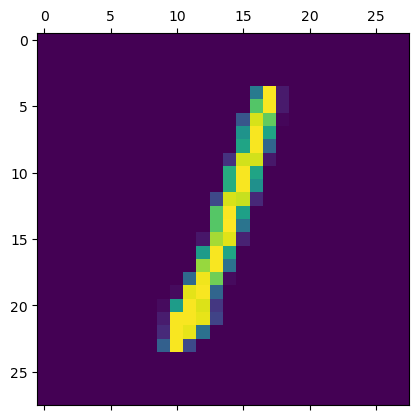

In [103]:
#Plotting the shape of the stored value
plt.matshow(x_test[7000])

In [104]:
print(y_test[7000])

1


In [105]:
x_train, x_test = x_train / 255.0, x_test / 255.0 #gray scale image correction

In [106]:
x_train = x_train.reshape(-1, 28, 28, 1) #60k samples of size 28x28 and channel no. 1
x_test = x_test.reshape(-1, 28, 28, 1) #10k samples

In [107]:
model = keras.Sequential([
    #Convolution layer (Extracts features from images)
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),   

    #Max Pooling Layer (Reduces Image Size)
    keras.layers.MaxPooling2D(2,2),

    #Flatten Layer (Converts image data into a 1D vector)
    keras.layers.Flatten(),

    #Fully Connected Layer (Processes extracted features)
    keras.layers.Dense(128, activation='relu'),

    #Output layer (10 classes for digits 0-9)
    keras.layers.Dense(10, activation='softmax')
])

In [108]:
#Compile the model
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [109]:
#Train the model
model.fit(x_train, y_train, epochs=8, batch_size = 32, validation_split=0.2)

Epoch 1/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9033 - loss: 0.3339 - val_accuracy: 0.9804 - val_loss: 0.0710
Epoch 2/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9809 - loss: 0.0609 - val_accuracy: 0.9793 - val_loss: 0.0656
Epoch 3/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9887 - loss: 0.0355 - val_accuracy: 0.9841 - val_loss: 0.0543
Epoch 4/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9922 - loss: 0.0238 - val_accuracy: 0.9843 - val_loss: 0.0543
Epoch 5/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9951 - loss: 0.0160 - val_accuracy: 0.9858 - val_loss: 0.0518
Epoch 6/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9963 - loss: 0.0108 - val_accuracy: 0.9862 - val_loss: 0.0517
Epoch 7/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9978 - loss: 0.0072 - val_accuracy: 0.9861 - val_loss: 0.0563
Epoch 8/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9977 - loss: 0.0071 - 

In [113]:
#Evaluate the model on the test set

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss : , {loss:.4f}")
print(f"Test Accuracy : , {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9806 - loss: 0.0630
Test Loss : , 0.0538
Test Accuracy : , 0.9847


### Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


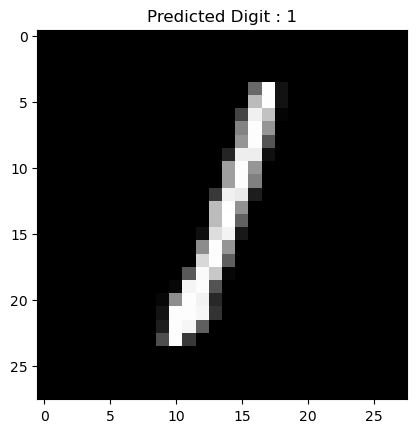

In [115]:
predictions = model.predict(x_test)

#Pick an image from test set
index = 7000 #Change this value to test other images
plt.imshow(x_test[index].reshape(28,28), cmap='gray')

#Get the predicted label
predicted_label = np.argmax(predictions[index])
plt.title(f"Predicted Digit : {predicted_label}")
plt.show()